### Importing libraries 

In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
from dateutil import parser
import matplotlib.pyplot as plt

### Importing Data

In [70]:
# df = pd.read_csv('../data/ytdataframe.csv')

df = pd.read_csv(r'C:\Users\wled3\ytunlabeled2.csv')

In [71]:
df.head(1)

,Unnamed: 0,video_id,avg polarity score,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,subscribers,totalViews,totalVideos
0,0,jGwO_UgTS7I,0.277473,Stanford Online,"Stanford CS229: Machine Learning Course, Lectu...",For more information about Stanford’s Artifici...,"['Andrew Ng', 'Computer Science', 'Stanford', ...",2020-04-17T20:07:45Z,1410150,18797,NaN,76,PT1H15M20S,hd,True,369000,20517888,1850


In [72]:
# df = df.append(dff)

# df.head(1)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          389 non-null    int64  
 1   video_id            389 non-null    object 
 2   avg polarity score  389 non-null    float64
 3   channelTitle        389 non-null    object 
 4   title               389 non-null    object 
 5   description         360 non-null    object 
 6   tags                348 non-null    object 
 7   publishedAt         389 non-null    object 
 8   viewCount           389 non-null    int64  
 9   likeCount           389 non-null    int64  
 10  favouriteCount      0 non-null      float64
 11  commentCount        389 non-null    int64  
 12  duration            389 non-null    object 
 13  definition          389 non-null    object 
 14  caption             389 non-null    bool   
 15  subscribers         389 non-null    int64  
 16  totalVie

# Data preprocessing 

Checking duplicates

In [74]:
df.duplicated().sum()


0

In [75]:
df = df.drop_duplicates()
df.shape

(389, 18)

Checking null values

In [76]:
df.isnull().sum()


Unnamed: 0              0
video_id                0
avg polarity score      0
channelTitle            0
title                   0
description            29
tags                   41
publishedAt             0
viewCount               0
likeCount               0
favouriteCount        389
commentCount            0
duration                0
definition              0
caption                 0
subscribers             0
totalViews              0
totalVideos             0
dtype: int64

Convert count columns to numeric

In [77]:
numeric_cols = ['viewCount', 'likeCount', 'commentCount']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

# dff[numeric_cols] = dff[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

Convert publish date to year

In [78]:
df['publishedAt'] = df['publishedAt'].apply(lambda x: parser.parse(x)) 
df['pushblishYear'] = df['publishedAt'].apply(lambda x: x.strftime("%Y"))

# dff['publishedAt'] = dff['publishedAt'].apply(lambda x: parser.parse(x)) 
# dff['pushblishYear'] = dff['publishedAt'].apply(lambda x: x.strftime("%Y"))

Convert duration to seconds

In [79]:
import isodate
df['durationSecs'] = df['duration'].apply(lambda x: isodate.parse_duration(x))
df['durationSecs'] = df['durationSecs'].astype('timedelta64[s]')

# dff['durationSecs'] = dff['duration'].apply(lambda x: isodate.parse_duration(x))
# dff['durationSecs'] = dff['durationSecs'].astype('timedelta64[s]')

Add tag count

In [80]:


df['tagCount'] = df['tags'].apply(lambda x: 0 if x is np.nan else len(x))

# dff['tagCount'] = dff['tags'].apply(lambda x: 0 if x is np.nan else len(x))

Add title and description length

In [81]:
df['title length'] = df['title'].apply(lambda x: 0 if x is np.nan else len(x))
df['description length'] = df['description'].apply(lambda x: 0 if x is np.nan else len(x))

# dff['title length'] = dff['title'].apply(lambda x: 0 if x is np.nan else len(x))
# dff['description length'] = dff['description'].apply(lambda x: 0 if x is np.nan else len(x))


In [82]:
# df['Label'] = df['Label'].apply(lambda x: 'Unlabeled' if x is np.nan else x)


Dropping columns we wont use

In [83]:
df = df.drop(['Unnamed: 0', 'description', 'title', 'publishedAt', 'duration', 'favouriteCount', 'video_id', 'tags'], axis=1)

# dff = dff.drop(['Unnamed: 0', 'description', 'title', 'publishedAt', 'duration', 'favouriteCount', 'video_id', 'tags'], axis=1)


# Modeling

In [84]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

Label encoding 

In [85]:
le = LabelEncoder()

df2 = ['channelTitle', 'definition', 'caption']

df[df2] = df[df2].apply(le.fit_transform)

# dffs = ['channelTitle', 'definition', 'caption']
# dff[dffs] = dff[dffs].apply(le.fit_transform)

df.isnull().sum()

avg polarity score    0
channelTitle          0
viewCount             0
likeCount             0
commentCount          0
definition            0
caption               0
subscribers           0
totalViews            0
totalVideos           0
pushblishYear         0
durationSecs          0
tagCount              0
title length          0
description length    0
dtype: int64

Splitting

In [86]:
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()


feat_col = ['channelTitle', 'viewCount', 'likeCount', 'definition', 'commentCount', 'caption', 'subscribers', 'totalViews', 'totalVideos', 'avg polarity score', 'pushblishYear', 'durationSecs', 'tagCount', 'description length', 'title length']

X = df[feat_col] # Features
# y = df['Label'] # Target variable

In [87]:
cols = X.columns

from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [88]:
X = pd.DataFrame(X, columns=[cols])

X.head()

,channelTitle,viewCount,likeCount,definition,commentCount,caption,subscribers,totalViews,totalVideos,avg polarity score,pushblishYear,durationSecs,tagCount,description length,title length
0,0.6,0.175870,0.104714,0.0,0.009200,1.0,0.196576,0.053108,0.791482,0.551579,0.857143,0.874854,0.262963,0.253895,0.727273
1,0.6,0.069939,0.036559,0.0,0.003753,1.0,0.196576,0.053108,0.791482,0.466838,0.857143,0.909303,0.296296,0.094693,1.000000
2,0.6,0.032905,0.014636,0.0,0.001211,1.0,0.196576,0.053108,0.791482,0.469647,0.857143,0.924290,0.092593,0.078870,0.988636
3,0.6,0.016033,0.006067,0.0,0.000363,1.0,0.196576,0.053108,0.791482,0.472899,0.857143,0.953095,0.135185,0.071324,0.977273
4,0.6,0.015648,0.007181,0.0,0.000968,1.0,0.196576,0.053108,0.791482,0.486309,0.857143,0.916115,0.159259,0.078870,0.863636


### K-Means model with two clusters

In [89]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=16) 

kmeans.fit(X)


KMeans(n_clusters=2, random_state=16)

### Model evaluation

In [90]:
kmeans.inertia_

192.8090536795923

Check quality of weak classification by the model

In [91]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
# correct_labels = sum(y == labels)

# print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

# print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

In [94]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Use elbow method to find optimal number of clusters

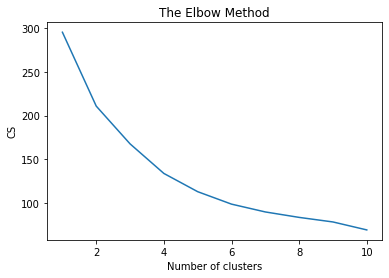

In [24]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 16)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

Trying 3 clusters

In [25]:
kmeans = KMeans(n_clusters=3, random_state=16)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 227 out of 534 samples were correctly labeled.
Accuracy score: 0.43


Trying 4 clusters

In [26]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 120 out of 534 samples were correctly labeled.
Accuracy score: 0.22


# Save model

In [27]:
# import pickle

# pickle.dump(LP_knn, open('LP_knn_Model', 'wb'))